# Research question 3 - topic detection LDA

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Styles" data-toc-modified-id="Styles-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Styles</a></span></li><li><span><a href="#Load-file" data-toc-modified-id="Load-file-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Load file</a></span></li><li><span><a href="#Create-Dictionary" data-toc-modified-id="Create-Dictionary-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Create Dictionary</a></span></li><li><span><a href="#Filter-extremes" data-toc-modified-id="Filter-extremes-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Filter extremes</a></span></li><li><span><a href="#Create-Term-Document-Frequency" data-toc-modified-id="Create-Term-Document-Frequency-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Create Term Document Frequency</a></span></li><li><span><a href="#Create-LDA-model" data-toc-modified-id="Create-LDA-model-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Create LDA model</a></span></li><li><span><a href="#Print-top-10-words-for-each-topic" data-toc-modified-id="Print-top-10-words-for-each-topic-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Print top 10 words for each topic</a></span></li><li><span><a href="#Plot-topics" data-toc-modified-id="Plot-topics-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Plot topics</a></span></li><li><span><a href="#Compute-perplexity-and-coherence-score" data-toc-modified-id="Compute-perplexity-and-coherence-score-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Compute perplexity and coherence score</a></span></li><li><span><a href="#Find-the-best-number-of-topics" data-toc-modified-id="Find-the-best-number-of-topics-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>Find the best number of topics</a></span></li><li><span><a href="#Assign-topic-to-each-sentence" data-toc-modified-id="Assign-topic-to-each-sentence-1.12"><span class="toc-item-num">1.12&nbsp;&nbsp;</span>Assign topic to each sentence</a></span></li></ul></li></ul></div>

## Setup

### Imports

In [67]:
import re
import pickle
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Enable logging for gensim
import logging
logging.basicConfig(filename='gensim.log', format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
import logging
logging.basicConfig(filename='gensim.log', format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.simplefilter('ignore', category=FutureWarning)

### Styles

In [68]:
def set_plot_styles(styles):
    mpl.rcParams.update(mpl.rcParamsDefault)
    plt.style.use(styles)
    
set_plot_styles(['mplstyle.config'])
color = sns.color_palette('tab20')

### Load file

In [164]:
with open('token.pkl', 'rb') as f:
    data_lemmatized = pickle.load(f)

### Create Dictionary

In [165]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

In [166]:
print(id2word)

Dictionary(7161 unique tokens: ['accommodate', 'host', 'speak', 'break', 'charge']...)


### Filter extremes

In [113]:
id2word.filter_extremes(no_below=10, no_above=0.5)

In [114]:
print(id2word)

Dictionary(5760 unique tokens: ['home', 'time', 'place', 'hutong', 'chat']...)


###  Create Term Document Frequency

In [167]:
# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1)]]


In [168]:
print('Number of unique tokens: %d' % len(id2word))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 7161
Number of documents: 55792


### Create LDA model

In [169]:
num_topics = 10
lda_model = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                                                id2word=id2word,
                                                num_topics=num_topics, 
                                                random_state=100,
                                                #chunksize=2000,
                                                passes=10, 
                                                #eta=[1]*len(id2word.keys()),
                                                #alpha='asymmetric',
                                                #alpha=[0.1]*num_topics,
                                                #eta=[0.01]*len(id2word.keys()),
                                                workers=7,
                                                #iterations=400,
                                                #alpha='asymmetric',
                                                #eta='auto',
                                                per_word_topics=True,
                                                #eval_every=1
                                                   )

In [59]:
import pickle
with open('lda_model.pkl', 'wb') as f:
    pickle.dump(lda_model, f)

### Print top 10 words for each topic

In [170]:
pprint(lda_model.print_topics())
#doc_lda = lda_model[corpus]

[(0,
  '0.179*"room" + 0.061*"bed" + 0.038*"bathroom" + 0.035*"recommend" + '
  '0.026*"kitchen" + 0.021*"bedroom" + 0.018*"shower" + 0.017*"photo" + '
  '0.014*"need" + 0.013*"answer"'),
 (1,
  '0.091*"check" + 0.074*"restaurant" + 0.032*"shop" + 0.027*"lot" + '
  '0.025*"work" + 0.019*"eat" + 0.016*"area" + 0.015*"leave" + 0.015*"clean" + '
  '0.014*"bar"'),
 (2,
  '0.272*"location" + 0.047*"apartment" + 0.029*"city" + 0.027*"station" + '
  '0.018*"place" + 0.018*"could" + 0.016*"minute" + 0.016*"value" + '
  '0.016*"heart" + 0.015*"describe"'),
 (3,
  '0.052*"time" + 0.038*"amenity" + 0.035*"provide" + 0.033*"people" + '
  '0.023*"apartment" + 0.018*"unit" + 0.017*"towel" + 0.015*"issue" + '
  '0.015*"guest" + 0.012*"noise"'),
 (4,
  '0.259*"host" + 0.040*"family" + 0.029*"question" + 0.025*"help" + '
  '0.024*"respond" + 0.023*"need" + 0.016*"santiago" + 0.016*"communication" + '
  '0.016*"meet" + 0.015*"problem"'),
 (5,
  '0.084*"thank" + 0.043*"neighborhood" + 0.032*"apartment" +

### Plot topics

In [171]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, sort_topics=False)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.043318 -0.217604       1        1   8.920617
1      0.122617  0.003382       2        1   9.664469
2      0.138619  0.250415       3        1  10.501600
3      0.034461 -0.099209       4        1   9.546705
4     -0.091274 -0.192961       5        1   9.389346
5      0.086188  0.012275       6        1   8.400182
6      0.002552 -0.054029       7        1   8.992698
7      0.207916  0.084788       8        1  10.583710
8     -0.268220  0.046082       9        1  11.931601
9     -0.276177  0.166860      10        1  12.069072, topic_info=           Term         Freq        Total Category  logprob  loglift
10        place  6610.000000  6610.000000  Default  30.0000  30.0000
28     location  4505.000000  4505.000000  Default  29.0000  29.0000
16         stay  6868.000000  6868.000000  Default  28.0000  28.0000
1          host  3832.000000  3832.000000  Default  27.0000  27.0000
12         room  2522.000000  2522.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
418      friend   115.652738   420.935719  Topic10  -5.1009   0.8226
44         need   176.666537  2011.461931  Topic10  -4.6772  -0.3178
88         feel   118.110418   694.539107  Topic10  -5.0799   0.3429
260        book   101.307169   436.864513  Topic10  -5.2333   0.6531
25   experience   103.514506   913.017122  Topic10  -5.2118  -0.0625

[632 rows x 6 columns], token_table=      Topic      Freq                    Term
term                                         
118       9  0.987004         absolutely_love
151       3  0.004615                  access
151       8  0.987550                  access
0         2  0.159660             accommodate
0         3  0.002217             accommodate
...     ...       ...                     ...
120       3  0.813026  would_highly_recommend
120      10  0.177636  would_highly_recommend
306      10  0.995528         would_recommend
840       1  0.971932   would_recommend_staye
6329      3  0.955191               ximending

[1552 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

### Compute perplexity and coherence score

In [172]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_1perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.782990473199299

Coherence Score:  0.2869120464791519


### Find the best number of topics

In [131]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamulticore.LdaMulticore(corpus=corpus, 
                                                        num_topics=num_topics, 
                                                        id2word=id2word, 
                                                        random_state=100,
                                                        chunksize=2000,
                                                        passes=4, 
                                                        #alpha=[1]*num_topics,
                                                        eta=[1]*len(id2word.keys()),
                                                        workers=7,
                                                        iterations=400,
                                                        alpha='asymmetric',
                                                        #eta='auto',
                                                        per_word_topics=True
                                                       )
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [132]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=5, limit=11, step=1)

In [102]:
with open('model_list.pkl', 'wb') as f:
    pickle.dump(model_list, f)

In [103]:
with open('coherence_values.pkl', 'wb') as f:
    pickle.dump(coherence_values, f)

In [138]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print('Num Topics =', m, 'has Coherence Value of', round(cv, 4))

Num Topics = 5 has Coherence Value of 0.2377
Num Topics = 6 has Coherence Value of 0.2741
Num Topics = 7 has Coherence Value of 0.221
Num Topics = 8 has Coherence Value of 0.2787
Num Topics = 9 has Coherence Value of 0.2369
Num Topics = 10 has Coherence Value of 0.2644


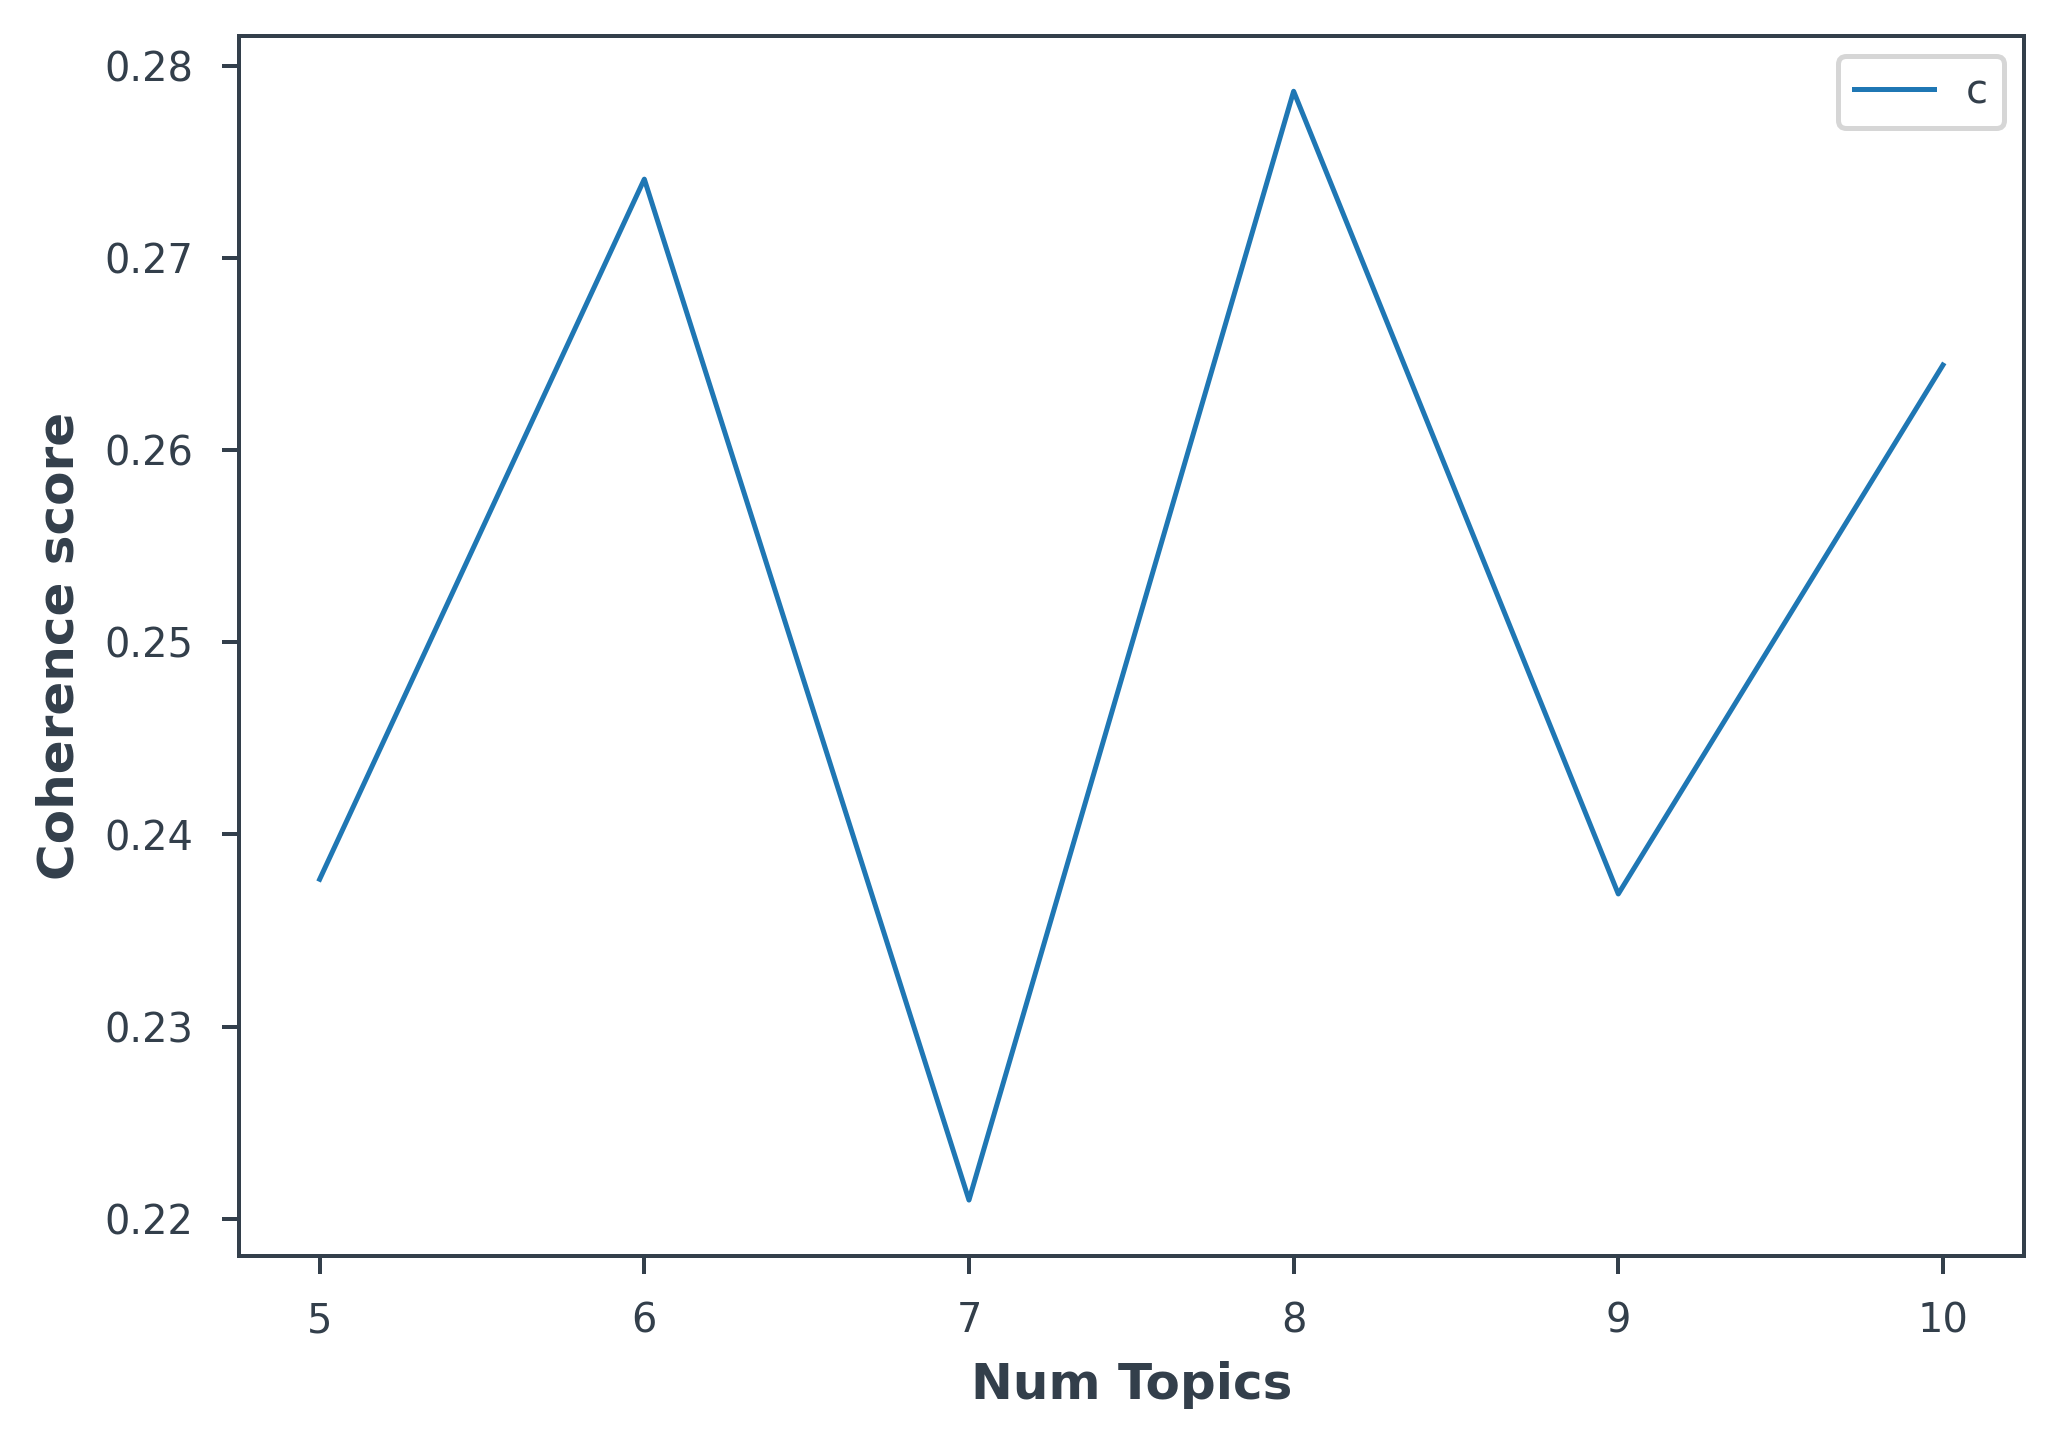

In [134]:
# Show graph
limit=11; start=5; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel('Num Topics')
plt.ylabel('Coherence score')
plt.legend(('coherence_values'), loc='best')
plt.show()

In [140]:
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=15))

[(0,
  '0.239*"place" + 0.133*"host" + 0.064*"stay" + 0.051*"time" + 0.026*"check" '
  '+ 0.023*"home" + 0.023*"family" + 0.017*"question" + 0.015*"house" + '
  '0.015*"trip" + 0.013*"thank" + 0.012*"communication" + 0.011*"need" + '
  '0.011*"visit" + 0.010*"way"'),
 (1,
  '0.237*"location" + 0.229*"apartment" + 0.033*"neighborhood" + '
  '0.019*"downtown" + 0.016*"building" + 0.015*"minute" + 0.013*"bus" + '
  '0.013*"subway" + 0.011*"train_station" + 0.010*"value" + 0.010*"person" + '
  '0.010*"heart" + 0.010*"train" + 0.009*"station" + 0.009*"touch"'),
 (2,
  '0.078*"space" + 0.056*"day" + 0.055*"night" + 0.054*"experience" + '
  '0.046*"lot" + 0.037*"thing" + 0.034*"food" + 0.030*"friend" + 0.024*"spot" '
  '+ 0.023*"couple" + 0.015*"luggage" + 0.014*"week" + 0.013*"love" + '
  '0.013*"hour" + 0.012*"work"'),
 (3,
  '0.095*"bed" + 0.066*"amenity" + 0.035*"picture" + 0.032*"help" + '
  '0.025*"accommodation" + 0.022*"shower" + 0.018*"message" + 0.017*"facility" '
  '+ 0.017*"size" 

In [141]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.396501  0.007586       1        1  25.275583
1     -0.071756 -0.333279       2        1  18.356395
2      0.094214  0.045104       3        1  13.569519
4     -0.108377  0.141618       4        1  10.345121
7     -0.051905 -0.150492       5        1   9.875348
3     -0.080669  0.181189       6        1   8.822145
6     -0.077297  0.080529       7        1   7.052010
5     -0.100712  0.027744       8        1   6.703879, topic_info=          Term           Freq          Total Category  logprob  loglift
17       place  123905.000000  123905.000000  Default  30.0000  30.0000
21    location   89385.000000   89385.000000  Default  29.0000  29.0000
48   apartment   86295.000000   86295.000000  Default  28.0000  28.0000
34        room   42797.000000   42797.000000  Default  27.0000  27.0000
1         host   68825.000000   68825.000000  Default  26.0000  26.0000
..         ...            ...            ...      ...      ...      ...
528  necessity     636.682973     643.750844   Topic8  -5.3756   2.6914
565  situation     620.634823     627.699408   Topic8  -5.4011   2.6912
155    station    6151.841685    9489.973072   Topic8  -3.1074   2.2690
106      value    3975.120493    7861.605616   Topic8  -3.5441   2.0205
183  appliance     729.435739    1059.512976   Topic8  -5.2396   2.3292

[350 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
331       1  0.000238  access
331       2  0.402998  access
331       3  0.000476  access
331       4  0.383740  access
331       5  0.143368  access
...     ...       ...     ...
188       4  0.001468   world
188       5  0.001468   world
188       6  0.001468   world
188       7  0.001468   world
188       8  0.989724   world

[2408 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 5, 8, 4, 7, 6])

### Assign topic to each sentence

In [102]:
sentence_topics = []
for x in corpus:
    if len(x) != 0:
        topics = lda_model.get_document_topics(x)
        sentence_topics.append(topics)
    else:
        sentence_topics.append([])

In [103]:
# for each review, find topic with highest weight
highest_prob = []
topic_highest_prob = []
for topics_weights in sentence_topics: # for each list of topic-weight pairs
    if len(topics_weights) > 0:
        highest = max(pair[1] for pair in topics_weights) # find the highest weight
        toptopic = [pair[0] for pair in topics_weights if pair[1] == highest][0] # find the topic with the highest weight, may have ties, use only the first one
    else:
        highest = None
        toptopic = None
    highest_prob.append(highest)
    topic_highest_prob.append(toptopic)

In [65]:
with open('data.pkl', 'rb') as f:
    data = pickle.load(f)

In [183]:
data.head()

,id,date,comments,host_id,host_since,neighbourhood_cleansed,city,latitude,longitude,number_of_reviews,...,sentences_to_tokens,sentences_to_tokens_regex,token_lemmatized,tokens_lemmatized,sentence_countdata,corpus,sentence_topics,highest_prob,topic_highest_prob,no_of_topics
2779359,6914699,2016-03-12,Cozy and charming historical house in the cent...,29544201,2015-03-18,东城区,Beijing,39.94292,116.42102,73,...,"[[Cozy, and, charming, historical, house, in, ...","[[Cozy, and, charming, historical, house, in, ...","[[[cozy, charm, historical, house, center]], [...","[[cozy, charm, historical, house, center], [ro...",4,"[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)], [(5...","[[(0, 0.016671542), (1, 0.016671542), (2, 0.38...","[0.48387453, 0.69702494, 0.6833169, None]","[5, 5, 4, None]",4
2795589,32997950,2019-07-25,This is a lovely shared apartment. You have yo...,46840971,2015-10-18,东城区,Beijing,39.91785,116.41532,43,...,"[[This, is, a, lovely, shared, apartment, .], ...","[[This, is, a, lovely, shared, apartment], [Yo...","[[[lovely, share, apartment]], [[individual, e...","[[lovely, share, apartment], [individual, ensu...",6,"[[(16, 1), (17, 1), (18, 1)], [(19, 1), (20, 1...","[[(0, 0.02500063), (1, 0.025002021), (2, 0.025...",[0.5249829],[3],1
2779597,7239103,2016-04-06,"The house is wonderfully designed , especially...",29544201,2015-03-18,东城区,Beijing,39.94314,116.41417,95,...,"[[The, house, is, wonderfully, designed, espec...","[[The, house, is, wonderfully, designed, espec...","[[[house, wonderfully, design, especially, lov...","[[house, wonderfully, design, especially, love...",12,"[[(4, 1), (29, 1), (30, 1), (31, 1), (32, 1), ...",[],[],[],0
2797750,39686549,2019-11-11,"Good room, everything seemed clean, enough spa...",209023661,2018-08-12,海淀区,Beijing,39.99353,116.34111,16,...,"[[Good, room, everything, seemed, clean, enoug...","[[Good, room, everything, seemed, clean, enoug...","[[[good, room, clean, space, people, big, soli...","[[good, room, clean, space, people, big, solid...",5,"[[(5, 1), (9, 1), (76, 1), (77, 1), (78, 1), (...",[],[],[],0
2790780,24239168,2018-07-15,Lu was very welcoming and his command of Engli...,127613055,2017-04-25,西城区,Beijing,39.89151,116.32731,18,...,"[[Lu, was, very, welcoming, and, his, command,...","[[Lu, was, very, welcoming, and, his, command,...","[[[welcoming, command, mean, good, host, forei...","[[welcoming, command, mean, good, host, foreig...",7,"[[(78, 1), (94, 1), (95, 1), (96, 1), (97, 1),...",[],[],[],0


In [184]:
data['sentence_countdata'] = data.tokens_lemmatized.apply(lambda x: len(x))

In [185]:
data['sentence_topics'] = None
data['sentence_topics'] = data['sentence_topics'].astype('object')
for index, row in data.iterrows():
    n = row['sentence_countdata']
    data.at[index, 'sentence_topics'] = sentence_topics[:n]
    sentence_topics = sentence_topics[n:]

In [186]:
data.head(20)

,id,date,comments,host_id,host_since,neighbourhood_cleansed,city,latitude,longitude,number_of_reviews,...,sentences_to_tokens,sentences_to_tokens_regex,token_lemmatized,tokens_lemmatized,sentence_countdata,corpus,sentence_topics,highest_prob,topic_highest_prob,no_of_topics
2779359,6914699,2016-03-12,Cozy and charming historical house in the cent...,29544201,2015-03-18,东城区,Beijing,39.94292,116.42102,73,...,"[[Cozy, and, charming, historical, house, in, ...","[[Cozy, and, charming, historical, house, in, ...","[[[cozy, charm, historical, house, center]], [...","[[cozy, charm, historical, house, center], [ro...",4,"[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)], [(5...","[[(0, 0.016671542), (1, 0.016671542), (2, 0.38...","[0.48387453, 0.69702494, 0.6833169, None]","[5, 5, 4, None]",4
2795589,32997950,2019-07-25,This is a lovely shared apartment. You have yo...,46840971,2015-10-18,东城区,Beijing,39.91785,116.41532,43,...,"[[This, is, a, lovely, shared, apartment, .], ...","[[This, is, a, lovely, shared, apartment], [Yo...","[[[lovely, share, apartment]], [[individual, e...","[[lovely, share, apartment], [individual, ensu...",6,"[[(16, 1), (17, 1), (18, 1)], [(19, 1), (20, 1...","[[(0, 0.02500063), (1, 0.025002021), (2, 0.025...",[0.5249829],[3],1
2779597,7239103,2016-04-06,"The house is wonderfully designed , especially...",29544201,2015-03-18,东城区,Beijing,39.94314,116.41417,95,...,"[[The, house, is, wonderfully, designed, espec...","[[The, house, is, wonderfully, designed, espec...","[[[house, wonderfully, design, especially, lov...","[[house, wonderfully, design, especially, love...",12,"[[(4, 1), (29, 1), (30, 1), (31, 1), (32, 1), ...","[[(0, 0.010002318), (1, 0.010002845), (2, 0.01...",[],[],0
2797750,39686549,2019-11-11,"Good room, everything seemed clean, enough spa...",209023661,2018-08-12,海淀区,Beijing,39.99353,116.34111,16,...,"[[Good, room, everything, seemed, clean, enoug...","[[Good, room, everything, seemed, clean, enoug...","[[[good, room, clean, space, people, big, soli...","[[good, room, clean, space, people, big, solid...",5,"[[(5, 1), (9, 1), (76, 1), (77, 1), (78, 1), (...","[[(0, 0.011113217), (1, 0.0111141605), (2, 0.0...",[],[],0
2790780,24239168,2018-07-15,Lu was very welcoming and his command of Engli...,127613055,2017-04-25,西城区,Beijing,39.89151,116.32731,18,...,"[[Lu, was, very, welcoming, and, his, command,...","[[Lu, was, very, welcoming, and, his, command,...","[[[welcoming, command, mean, good, host, forei...","[[welcoming, command, mean, good, host, foreig...",7,"[[(78, 1), (94, 1), (95, 1), (96, 1), (97, 1),...","[[(0, 0.014297143), (1, 0.5399673), (2, 0.0142...",[],[],0
2790815,24278950,2018-08-25,I stayed 10 weeks and it was an amazing time. ...,42227491,2015-08-22,朝阳区 / Chaoyang,Beijing,39.90802,116.47451,28,...,"[[I, stayed, weeks, and, it, was, an, amazing,...","[[I, stayed, weeks, and, it, was, an, amazing,...","[[[stay, week, amazing, time]], [[come, defini...","[[stay, week, amazing, time], [come, definitel...",2,"[[(92, 1), (120, 1), (121, 1), (122, 1)], [(89...","[[(0, 0.02000116), (1, 0.02000167), (2, 0.0200...",[],[],0
2796858,35808221,2019-07-19,If you want an undisturbed place to have some ...,267980396,2019-06-12,丰台区 / Fengtai,Beijing,39.87726,116.29333,9,...,"[[If, you, want, an, undisturbed, place, to, h...","[[If, you, want, an, undisturbed, place, to, h...","[[[want, undisturbed, place, rest, choice]], [...","[[want, undisturbed, place, rest, choice], [si...",4,"[[(74, 1), (124, 1), (125, 1), (126, 1)], [(9,...","[[(0, 0.020003906), (1, 0.020002276), (2, 0.02...",[],[],0
2789698,22491534,2018-04-27,It was a nice experience for a short stay. Cle...,147186064,2017-08-22,西城区,Beijing,39.88863,116.38701,94,...,"[[It, was, a, nice, experience, for, a, short,...","[[It, was, a, nice, experience, for, a, short,...","[[[nice, experience, short, stay]], [[clean, r...","[[nice, experience, short, stay], [clean, room...",3,"[[(8, 1), (92, 1), (133, 1), (134, 1)], [(5, 1...","[[(0, 0.020000203), (1, 0.02

In [187]:
data['highest_prob'] = None
data['highest_prob'] = data['highest_prob'].astype('object')
for index, row in data.iterrows():
    n = row['sentence_countdata']
    data.at[index, 'highest_prob'] = highest_prob[:n]
    highest_prob = highest_prob[n:]

In [188]:
data['topic_highest_prob'] = None
data['topic_highest_prob'] = data['topic_highest_prob'].astype('object')
for index, row in data.iterrows():
    n = row['sentence_countdata']
    data.at[index, 'topic_highest_prob'] = topic_highest_prob[:n]
    topic_highest_prob = topic_highest_prob[n:]

In [189]:
# create a column for number of topics in each review
data['no_of_topics'] = data['sentence_topics'].apply(len)

In [190]:
data.head()

,id,date,comments,host_id,host_since,neighbourhood_cleansed,city,latitude,longitude,number_of_reviews,...,sentences_to_tokens,sentences_to_tokens_regex,token_lemmatized,tokens_lemmatized,sentence_countdata,corpus,sentence_topics,highest_prob,topic_highest_prob,no_of_topics
2779359,6914699,2016-03-12,Cozy and charming historical house in the cent...,29544201,2015-03-18,东城区,Beijing,39.94292,116.42102,73,...,"[[Cozy, and, charming, historical, house, in, ...","[[Cozy, and, charming, historical, house, in, ...","[[[cozy, charm, historical, house, center]], [...","[[cozy, charm, historical, house, center], [ro...",4,"[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)], [(5...","[[(0, 0.016671542), (1, 0.016671542), (2, 0.38...","[0.48389202, 0.69696486, 0.6833173, None]","[5, 5, 4, None]",4
2795589,32997950,2019-07-25,This is a lovely shared apartment. You have yo...,46840971,2015-10-18,东城区,Beijing,39.91785,116.41532,43,...,"[[This, is, a, lovely, shared, apartment, .], ...","[[This, is, a, lovely, shared, apartment], [Yo...","[[[lovely, share, apartment]], [[individual, e...","[[lovely, share, apartment], [individual, ensu...",6,"[[(16, 1), (17, 1), (18, 1)], [(19, 1), (20, 1...","[[(0, 0.02500063), (1, 0.025002021), (2, 0.025...","[0.52498126, 0.6999252, 0.56430054, 0.6999982,...","[3, 4, 4, 5, 8, None]",6
2779597,7239103,2016-04-06,"The house is wonderfully designed , especially...",29544201,2015-03-18,东城区,Beijing,39.94314,116.41417,95,...,"[[The, house, is, wonderfully, designed, espec...","[[The, house, is, wonderfully, designed, espec...","[[[house, wonderfully, design, especially, lov...","[[house, wonderfully, design, especially, love...",12,"[[(4, 1), (29, 1), (30, 1), (31, 1), (32, 1), ...","[[(0, 0.010002318), (1, 0.010002845), (2, 0.01...","[0.30998474, 0.36663064, 0.27567026, 0.5057822...","[5, 4, 8, 9, 9, 0, 1, 1, None, 7, 8, None]",12
2797750,39686549,2019-11-11,"Good room, everything seemed clean, enough spa...",209023661,2018-08-12,海淀区,Beijing,39.99353,116.34111,16,...,"[[Good, room, everything, seemed, clean, enoug...","[[Good, room, everything, seemed, clean, enoug...","[[[good, room, clean, space, people, big, soli...","[[good, room, clean, space, people, big, solid...",5,"[[(5, 1), (9, 1), (76, 1), (77, 1), (78, 1), (...","[[(0, 0.011113217), (1, 0.0111141605), (2, 0.0...","[0.4649354, 0.4198707, 0.34999582, 0.6744321, ...","[5, 8, 2, 6, None]",5
2790780,24239168,2018-07-15,Lu was very welcoming and his command of Engli...,127613055,2017-04-25,西城区,Beijing,39.89151,116.32731,18,...,"[[Lu, was, very, welcoming, and, his, command,...","[[Lu, was, very, welcoming, and, his, command,...","[[[welcoming, command, mean, good, host, forei...","[[welcoming, command, mean, good, host, foreig...",7,"[[(78, 1), (94, 1), (95, 1), (96, 1), (97, 1),...","[[(0, 0.014297143), (1, 0.5399673), (2, 0.0142...","[0.5399673, 0.39901915, 0.51673675, 0.51670337...","[1, 1, 9, 2, 1, 8, None]",7


In [191]:
with open('data_after_lda.pkl', 'wb') as f:
    pickle.dump(data, f)